## 1. Importação das bibliotecas padrões para tratamento de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Importação do dataset do enem 2021

In [2]:
#descobrindo o encode dos dados
with open('D:\Gabriel\Documents\microdados_enem_2021\DADOS\MICRODADOS_ENEM_2021.csv') as f:
    print(f)

<_io.TextIOWrapper name='D:\\Gabriel\\Documents\\microdados_enem_2021\\DADOS\\MICRODADOS_ENEM_2021.csv' mode='r' encoding='cp1252'>


In [3]:
%%time

df = pd.read_csv('D:\Gabriel\Documents\microdados_enem_2021\DADOS\MICRODADOS_ENEM_2021.csv', sep=';', encoding = 'cp1252')

Wall time: 40.2 s


# linha test

In [54]:
df.dropna(inplace = True)

In [56]:
df.shape

(592189, 77)

## 3. Conhecendo o dataset

In [4]:
# mostrando as primeiras linhas
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [5]:
df.shape

(3389832, 76)

Aqui já da para ver que é um dataset bem grande com mais de 3 milhões de linhas, talvez para análise computacionais mais profundas seja necessário, em decorrencia das limitações da capacidade do meu computador pessoal, reduzir o dataset.

In [6]:
df.dtypes

NU_INSCRICAO        int64
NU_ANO              int64
TP_FAIXA_ETARIA     int64
TP_SEXO            object
TP_ESTADO_CIVIL     int64
                    ...  
Q021               object
Q022               object
Q023               object
Q024               object
Q025               object
Length: 76, dtype: object

Nos tipos é possível ver que há variáveis categóricas que estão sendo entendidas como numéricas, por exemplo, estado civil e número da inscrição. Tratarei disso no decorrer do estudo.

In [7]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [8]:
df.describe()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,3.389832e+06,3389832.0,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,1.096828e+06,...,2.245844e+06,3.389832e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,3.389830e+06
mean,2.100527e+11,2021.0,5.306013e+00,1.052073e+00,2.043491e+00,1.027106e+00,1.608430e+00,2.581980e+00,1.396214e+00,1.006295e+00,...,5.350802e+02,4.704640e-01,1.140684e+00,1.192657e+02,1.380269e+02,1.153117e+02,1.281853e+02,1.127109e+02,6.135005e+02,3.739557e+00
std,9.962403e+05,0.0,3.902871e+00,4.129414e-01,1.022561e+00,2.049293e-01,7.198306e-01,4.278731e+00,5.938455e-01,7.909361e-02,...,1.106267e+02,4.991269e-01,7.910804e-01,3.391962e+01,4.563224e+01,3.634138e+01,3.883252e+01,6.005667e+01,1.907142e+02,1.378942e+00
min,2.100510e+11,2021.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.100519e+11,2021.0,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,4.447000e+02,0.000000e+00,1.000000e+00,1.000000e+02,1.200000e+02,1.000000e+02,1.200000e+02,8.000000e+01,5.200000e+02,3.000000e+00
50%,2.100527e+11,2021.0,4.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,5.154000e+02,0.000000e+00,1.000000e+00,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.000000e+02,4.000000e+00
75%,2.100536e+11,2021.0,7.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,...,6.139000e+02,1.000000e+00,1.000000e+00,1.400000e+02,1.800000e+02,1.400000e+02,1.600000e+02,1.600000e+02,7.400000e+02,4.000000e+00
max,2.100545e+11,2021.0,2.000000e+01,4.000000e+00,6.000000e+00,4.000000e+00,4.000000e+00,1.500000e+01,3.000000e+00,2.000000e+00,...,9.531000e+02,1.000000e+00,9.000000e+00,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,1.000000e+03,2.000000e+01


In [9]:
df['TP_FAIXA_ETARIA'].describe()

count    3.389832e+06
mean     5.306013e+00
std      3.902871e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      7.000000e+00
max      2.000000e+01
Name: TP_FAIXA_ETARIA, dtype: float64

### Aqui causa uma estranhesa que terei que recorrer ao dicionário dos dados
Por exemplo que média de faixa etária é igual a 5. Consulto a documentação do conjunto de dados e descubro que é realizado por categorias que abarcam um intervalo de idade.

Por exemplo, categoria 5 representa os 20 anos e categoria 20 representa pessoas com mais de 70 anos. Numa parte final de apresentação dos dados seria necessário apresentar essa informação ao apresentar os resultados da pesquisa.


In [10]:
df.isna().sum()

NU_INSCRICAO       0
NU_ANO             0
TP_FAIXA_ETARIA    0
TP_SEXO            0
TP_ESTADO_CIVIL    0
                  ..
Q021               2
Q022               2
Q023               2
Q024               2
Q025               2
Length: 76, dtype: int64

### Documentação da raça está em categoria também, por enquanto, vou deixar assim se necessário tentarei converter para outro tipo
Por enquanto, basta entender que
    0:	Não declarado,
    1:	Branca,
    2:	Preta,
    3:	Parda,
    4:	Amarela,
    5:	Indígena, 
    6:	Não dispõe da informação.


## 4. Convertendo todo dataframe para os tipos apropriados.

In [11]:
df = df.astype("category")

In [12]:
df.dtypes

NU_INSCRICAO       category
NU_ANO             category
TP_FAIXA_ETARIA    category
TP_SEXO            category
TP_ESTADO_CIVIL    category
                     ...   
Q021               category
Q022               category
Q023               category
Q024               category
Q025               category
Length: 76, dtype: object

In [13]:
df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO']] = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO']].astype('float')

Como se pode ver eu optei por converter todo dataframe para object e depois converti apenas as colunas que possuem as notas para numerico

In [14]:
df.dtypes

NU_INSCRICAO       category
NU_ANO             category
TP_FAIXA_ETARIA    category
TP_SEXO            category
TP_ESTADO_CIVIL    category
                     ...   
Q021               category
Q022               category
Q023               category
Q024               category
Q025               category
Length: 76, dtype: object

## Detectando valores ausentes

In [15]:
df.isna().sum().sum()

44648935

In [16]:
df.isnull().sum()

NU_INSCRICAO       0
NU_ANO             0
TP_FAIXA_ETARIA    0
TP_SEXO            0
TP_ESTADO_CIVIL    0
                  ..
Q021               2
Q022               2
Q023               2
Q024               2
Q025               2
Length: 76, dtype: int64

In [17]:
df.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,2.245844e+06,2.378379e+06,2.378379e+06,2.245844e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06
mean,4.917857e+02,5.199434e+02,5.025556e+02,5.350802e+02,1.192657e+02,1.380269e+02,1.153117e+02,1.281853e+02,1.127109e+02,6.135005e+02
std,8.056676e+01,9.579050e+01,7.916405e+01,1.106267e+02,3.391962e+01,4.563224e+01,3.634138e+01,3.883252e+01,6.005667e+01,1.907142e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.310000e+02,4.454000e+02,4.476000e+02,4.447000e+02,1.000000e+02,1.200000e+02,1.000000e+02,1.200000e+02,8.000000e+01,5.200000e+02
50%,4.820000e+02,5.219000e+02,5.059000e+02,5.154000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.000000e+02
75%,5.458000e+02,5.893000e+02,5.588000e+02,6.139000e+02,1.400000e+02,1.800000e+02,1.400000e+02,1.600000e+02,1.600000e+02,7.400000e+02
max,8.671000e+02,8.469000e+02,8.261000e+02,9.531000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,1.000000e+03


In [18]:
for i in df:
    x = ((df[i].isna().sum()/len(df[i]))*100).round(2)
    print('coluna ',i,'possui ',x,'% de valores ausentes')

coluna  NU_INSCRICAO possui  0.0 % de valores ausentes
coluna  NU_ANO possui  0.0 % de valores ausentes
coluna  TP_FAIXA_ETARIA possui  0.0 % de valores ausentes
coluna  TP_SEXO possui  0.0 % de valores ausentes
coluna  TP_ESTADO_CIVIL possui  0.0 % de valores ausentes
coluna  TP_COR_RACA possui  0.0 % de valores ausentes
coluna  TP_NACIONALIDADE possui  0.0 % de valores ausentes
coluna  TP_ST_CONCLUSAO possui  0.0 % de valores ausentes
coluna  TP_ANO_CONCLUIU possui  0.0 % de valores ausentes
coluna  TP_ESCOLA possui  0.0 % de valores ausentes
coluna  TP_ENSINO possui  67.64 % de valores ausentes
coluna  IN_TREINEIRO possui  0.0 % de valores ausentes
coluna  CO_MUNICIPIO_ESC possui  75.99 % de valores ausentes
coluna  NO_MUNICIPIO_ESC possui  75.99 % de valores ausentes
coluna  CO_UF_ESC possui  75.99 % de valores ausentes
coluna  SG_UF_ESC possui  75.99 % de valores ausentes
coluna  TP_DEPENDENCIA_ADM_ESC possui  75.99 % de valores ausentes
coluna  TP_LOCALIZACAO_ESC possui  75.99 % 

## Análise dos dados

In [19]:
# calculando a média entre mulheres e homens
df.groupby('TP_SEXO')['NU_NOTA_REDACAO'].mean()

TP_SEXO
F    624.351338
M    595.929464
Name: NU_NOTA_REDACAO, dtype: float64

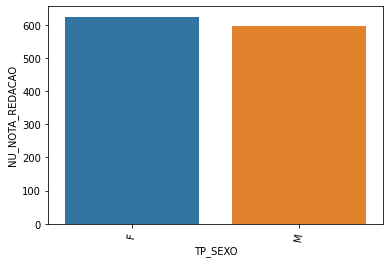

In [21]:
# Plot
sns.barplot(data = df, 
            y = 'NU_NOTA_REDACAO', 
            x = 'TP_SEXO')
plt.xticks(rotation = 80)
plt.show()

In [25]:
df[notas].mean()

NU_NOTA_CN         491.785675
NU_NOTA_CH         519.943395
NU_NOTA_LC         502.555569
NU_NOTA_MT         535.080186
NU_NOTA_COMP1      119.265668
NU_NOTA_REDACAO    613.500489
dtype: float64

In [33]:
# criando uma nova coluna com uma média simples das notas.

notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']

df['MEDIA_NOTAS'] = (df.NU_NOTA_CN + df.NU_NOTA_CH + df.NU_NOTA_LC + df.NU_NOTA_MT + df.NU_NOTA_REDACAO)/5

In [29]:
df['MEDIA_NOTAS']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
3389827   NaN
3389828   NaN
3389829   NaN
3389830   NaN
3389831   NaN
Name: MEDIA_NOTAS, Length: 3389832, dtype: float64

In [37]:
df['MEDIA_NOTAS'].head()

0       NaN
1    515.50
2       NaN
3    667.60
4    570.06
Name: MEDIA_NOTAS, dtype: float64

In [38]:
df['MEDIA_NOTAS'].describe()

count    2.238107e+06
mean     5.355403e+02
std      8.896142e+01
min      0.000000e+00
25%      4.714000e+02
50%      5.273200e+02
75%      5.944800e+02
max      8.626800e+02
Name: MEDIA_NOTAS, dtype: float64

## Possível ver que a media simples das notas é 535,54
## Também que a max dessa media simples das notas é 862,68

In [41]:
df['MEDIA_NOTAS'].isna().sum()

1151725

Incrivelmente, os dados possuem bastante dados faltantes 1151725 possuem algumas das notas faltantes no conjunto de dados